[0]


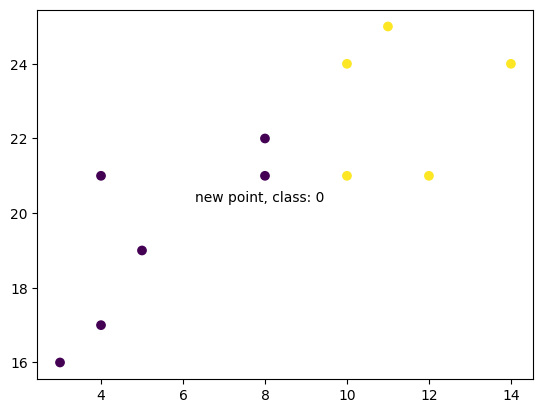

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
data = list(zip(x, y))

knn = KNeighborsClassifier(n_neighbors=1)# čia su vienu 'kaimynu'
#n_neighbours is the number of nearest neighbors to use.

knn.fit(data, classes)
new_x, new_y = 8, 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # 

import warnings
warnings.filterwarnings('ignore')

import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zzero0/uci-breast-cancer-wisconsin-original")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: C:\Users\Eridas\.cache\kagglehub\datasets\zzero0\uci-breast-cancer-wisconsin-original\versions\1
['breast-cancer-wisconsin.data.txt']


In [8]:
df = pd.read_csv(path+'/'+'breast-cancer-wisconsin.data.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [17]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median())

In [18]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [19]:

print(X.head(3))
print(y.head(3))

        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3                1        1  
0    2
1    2
2    2
Name: Class, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [23]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn.predict(X_test); y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

In [26]:
# score:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9785330948121646
0.9642857142857143
